## 6.2 Criteria


### 6.2.1 Continuous outcomes

With continuous outcome, we often use the squared error, or the $\ell_2$-norm,  
\[
L\left( y, \hat{y}\right) = \|y-\hat{y}\|_2^2\equiv  \left( y - \hat{y}\right)^2.
\]

A famous example that uses this loss function is the least squares estimation for linear regression. In a linear regression, the function $f(X,\beta)$ takes the form 
\[
f(X,\beta)= \beta_1 x_1 + \ldots + \beta_p x_p.  
\]
The linear model is usually the place to start for building a predictive model. However, it is rare to have a truly linear relationship between the outcomes and features. The linear form is also very restrictive in modeling. Therefore, the linear model is almost always outperformed by more flexible models. Nevertheless, it is a simply model for us to start exploring predictive modeling. 

In [1]:
library(tidyverse)
hotel <- read_csv("../Data/hotel_bookings.csv") 
hotel<- hotel %>% select(is_canceled, adr, lead_time, total_of_special_requests, stays_in_week_nights, stays_in_weekend_nights, previous_cancellations)
hotel<- hotel %>% mutate(is_canceled = (is_canceled==1));
hotel<-hotel %>% filter(adr<1000)
hotel<-hotel[1:1000,] # use a smaller data set 


-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  .default = col_double(),
  hotel = col_character(),
  arrival_date_month = col_character(),
  meal = col_character(),
  country = col_character(),
  market_segment = col_character(),
  distribution_channel = col_character(),
  reserved_room_type = col_character(),
  assigned_room_type = col_character(),
  deposit_type = col_character(),
  agent = col_character(),
  company = col_character(),
  custome

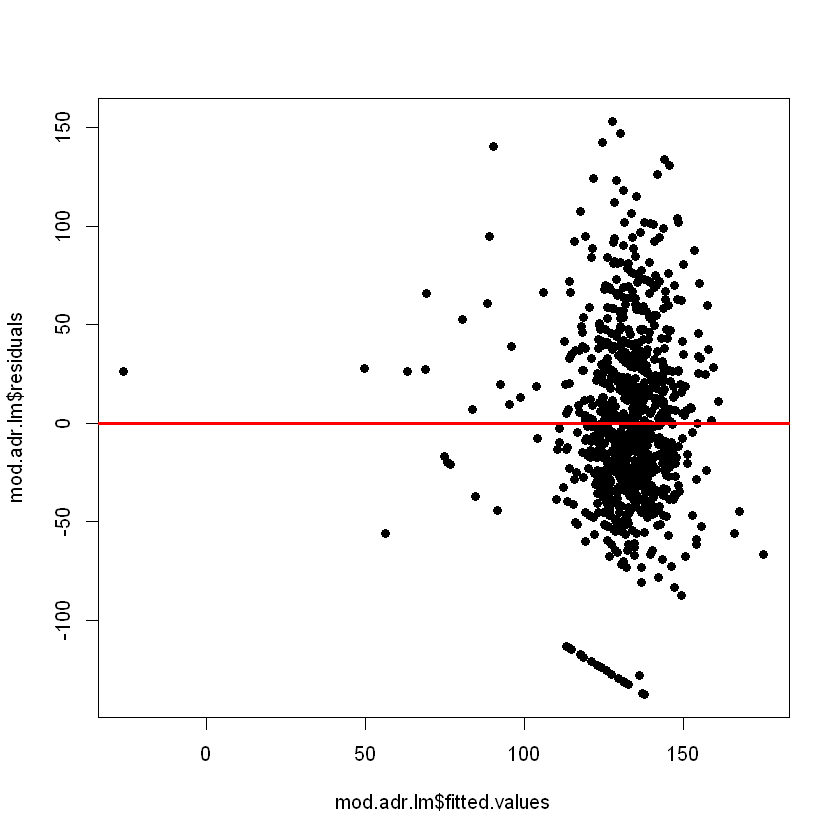

In [5]:
## Predicting ADR using a linear model 

mod.adr.lm<-lm(adr~lead_time+ total_of_special_requests+ stays_in_week_nights+ stays_in_weekend_nights+ previous_cancellations,data=hotel)

plot(mod.adr.lm$residuals~mod.adr.lm$fitted.values,pch=16)
abline(h=0,lwd=3,col="red")